In [4]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [6]:
import os
import shutil
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import plotly.express as px
import scipy as sp
import cv2
import keras
from scipy import ndimage
from shutil import copyfile
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
training_path = os.path.join(r'C:\Users\AT Once\Desktop\dataset\training_set')
test_path = os.path.join(r'C:\Users\AT Once\Desktop\dataset\test_set')
training_path_cats = os.path.join(r'C:\Users\AT Once\Desktop\dataset\training_set\cats')
training_path_dogs = os.path.join(r'C:\Users\AT Once\Desktop\dataset\training_set\dogs')
test_path_cats = os.path.join(r'C:\Users\AT Once\Desktop\dataset\test_set\cats')
test_path_dogs = os.path.join(r'C:\Users\AT Once\Desktop\dataset\test_set\dogs')

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(training_path,target_size=(224,224),batch_size = 20,class_mode = 'binary')
test_generator = train_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size = 20,class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\anaconda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_generator,
                    epochs=25,
                    verbose=1,
                    validation_data=test_generator)

#history = model.fit(train_generator, train_labels, epochs=10, 
 #                   validation_data=(test_generator, test_labels))
#history = model.fit(train_generator, steps_per_epoch=train_generator.samples,epochs=10, validation_data=test_generator, verbose=test_generator.samples,validation_steps=10)
#model.fit( train_generator, steps_per_epoch = 10, epochs = 2, validation_data = test_generator, verbose = 1, validation_steps = 32)

Epoch 1/25


C:\Users\anaconda\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 251s 626ms/step - accuracy: 0.5434 - loss: 0.7045 - val_accuracy: 0.6650 - val_loss: 0.6208
Epoch 2/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 229s 572ms/step - accuracy: 0.6568 - loss: 0.6180 - val_accuracy: 0.7140 - val_loss: 0.5416
Epoch 3/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 229s 571ms/step - accuracy: 0.7090 - loss: 0.5532 - val_accuracy: 0.6995 - val_loss: 0.6012
Epoch 4/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 229s 571ms/step - accuracy: 0.7632 - loss: 0.4923 - val_accuracy: 0.7840 - val_loss: 0.4694
Epoch 5/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 231s 577ms/step - accuracy: 0.8162 - loss: 0.4073 - val_accuracy: 0.7745 - val_loss: 0.4702
Epoch 6/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 232s 580ms/step - accuracy: 0.8478 - loss: 0.3457 - val_accuracy: 0.7970 - val_loss: 0.4907
Epoch 7/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 235s 587ms/step - accuracy: 0.8795 - loss: 0.2765 - val_accuracy: 0.8230 - val_loss: 0.4512
Epoch 8/25
400/400 ━━━━━━━━━━━━━━━━━━━━ 243s 606ms/step - accuracy: 0.9261 - loss: 0.18

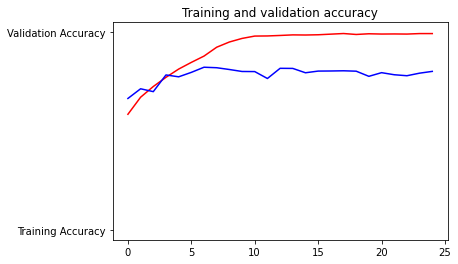

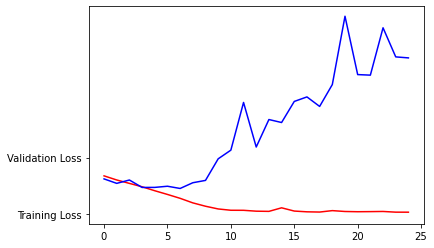

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

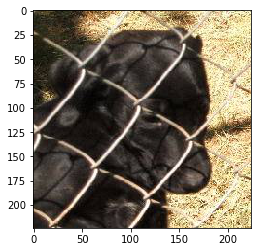

In [22]:
from tensorflow.keras.preprocessing import image
path = r'C:\Users\AT Once\Desktop\dataset\test_set\dogs\dog.4013.jpg'
img = image.load_img(path,target_size = (224,224))
plt.imshow(img,interpolation = 'nearest')
plt.show()


In [32]:
img_arr = np.array(img)
img_arr = img_arr / 255.0
img_arr.shape

(224, 224, 3)

In [35]:
img_arr = img_arr.reshape(1,224, 224, 3)

In [38]:
a = model.predict(img_arr)
if a == 0:
    print('cat')
else:
    print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
dog
